In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
dataframe = pd.read_csv('movies_initial.csv')

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 0 to 46013
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbID       46014 non-null  int64  
 1   title        46014 non-null  object 
 2   year         46014 non-null  object 
 3   rating       24629 non-null  object 
 4   runtime      43377 non-null  object 
 5   genre        45615 non-null  object 
 6   released     43002 non-null  object 
 7   director     45409 non-null  object 
 8   writer       42942 non-null  object 
 9   cast         44928 non-null  object 
 10  metacritic   9401 non-null   float64
 11  imdbRating   44300 non-null  float64
 12  imdbVotes    44299 non-null  float64
 13  poster       35798 non-null  object 
 14  plot         42161 non-null  object 
 15  fullplot     41421 non-null  object 
 16  language     44899 non-null  object 
 17  country      45830 non-null  object 
 18  awards       23542 non-null  object 
 19  last

In [15]:
dataframe.isnull().sum()

imdbID             0
title              0
year               0
rating         21385
runtime         2637
genre            399
released        3012
director         605
writer          3072
cast            1086
metacritic     36613
imdbRating      1714
imdbVotes       1715
poster         10216
plot            3853
fullplot        4593
language        1115
country          184
awards         22472
lastupdated        0
type              38
dtype: int64

##### A bar chart showing the percentage of missing values in each column. We'll identify columns where more than 15% of the values are missing and consider dropping them later."

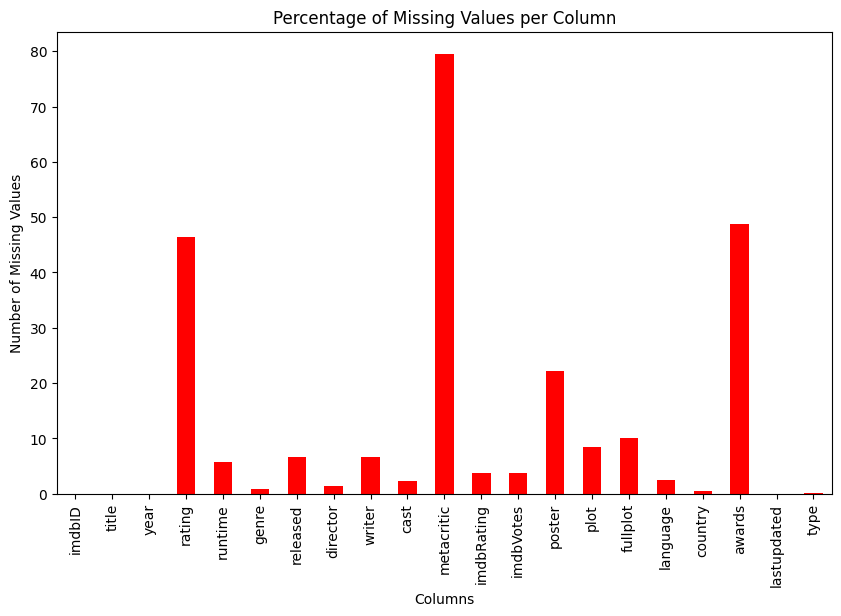

In [16]:


percent_missing_counts = (dataframe.isnull().sum()/dataframe.shape[0])*100
plt.figure(figsize=(10, 6))
percent_missing_counts.plot(kind='bar',color='red')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


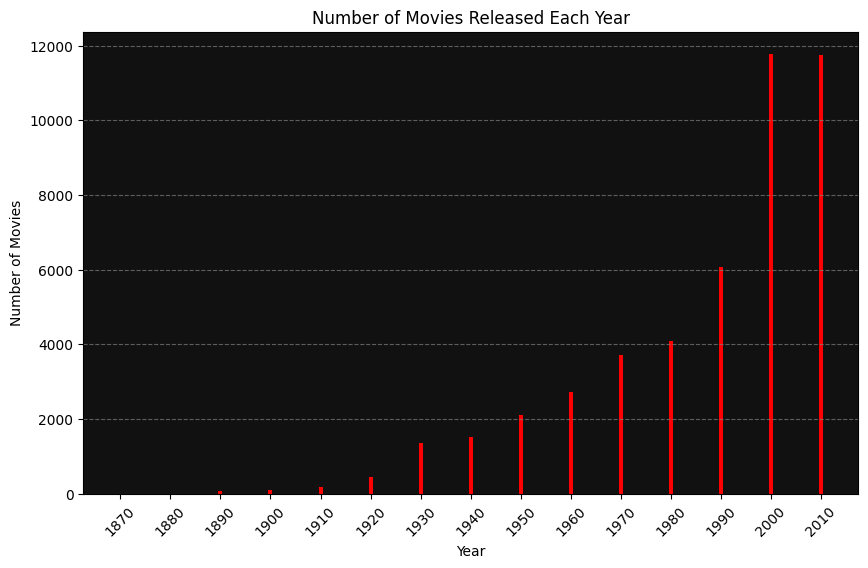

In [17]:
import matplotlib.pyplot as plt

mask = pd.to_numeric(dataframe['year'], errors='coerce')
movie_counts = mask.dropna().apply(lambda x: x - x%10).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(movie_counts.index, movie_counts.values, color='red')


plt.title('Number of Movies Released Each Year', color='black')
plt.xlabel('Year', color='black')
plt.ylabel('Number of Movies', color='black')
plt.xticks(ticks=movie_counts.index,rotation=45, color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('#111111')  
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)  


plt.show()


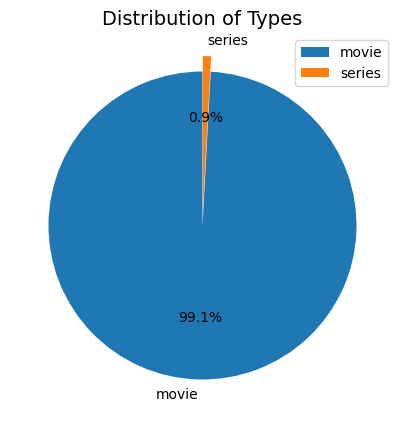

In [18]:
import matplotlib.pyplot as plt


type_counts = dataframe['type'].dropna().value_counts()

plt.figure(figsize=(5,5))


explode = [0, 0.1]

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, explode= explode )


plt.title('Distribution of Types', fontsize=14, color='black')
plt.legend()

plt.show()


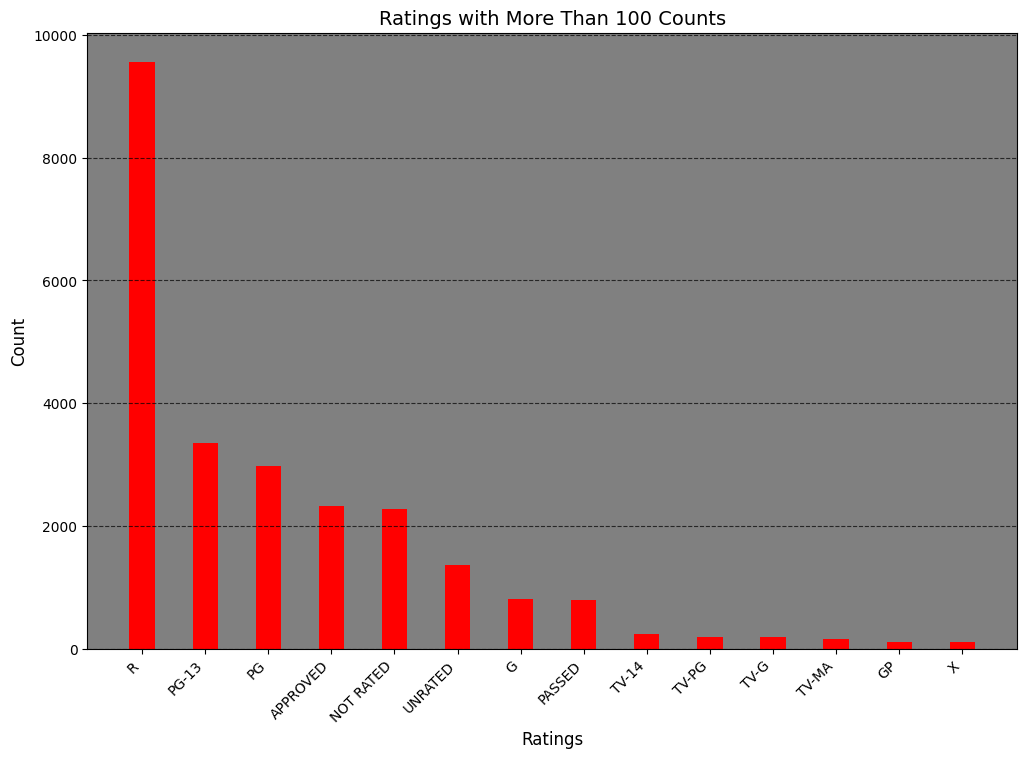

In [19]:

rating_counts = dataframe['rating'].value_counts()

filtered_rating_counts = rating_counts[rating_counts > 100]

plt.figure(figsize=(12, 8))
plt.bar(filtered_rating_counts.index, filtered_rating_counts.values, color='r',width=0.4)

plt.title('Ratings with More Than 100 Counts', fontsize=14)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().set_facecolor('grey')  
plt.grid(axis='y', linestyle='--', color='black', alpha=0.7)  
plt.show()


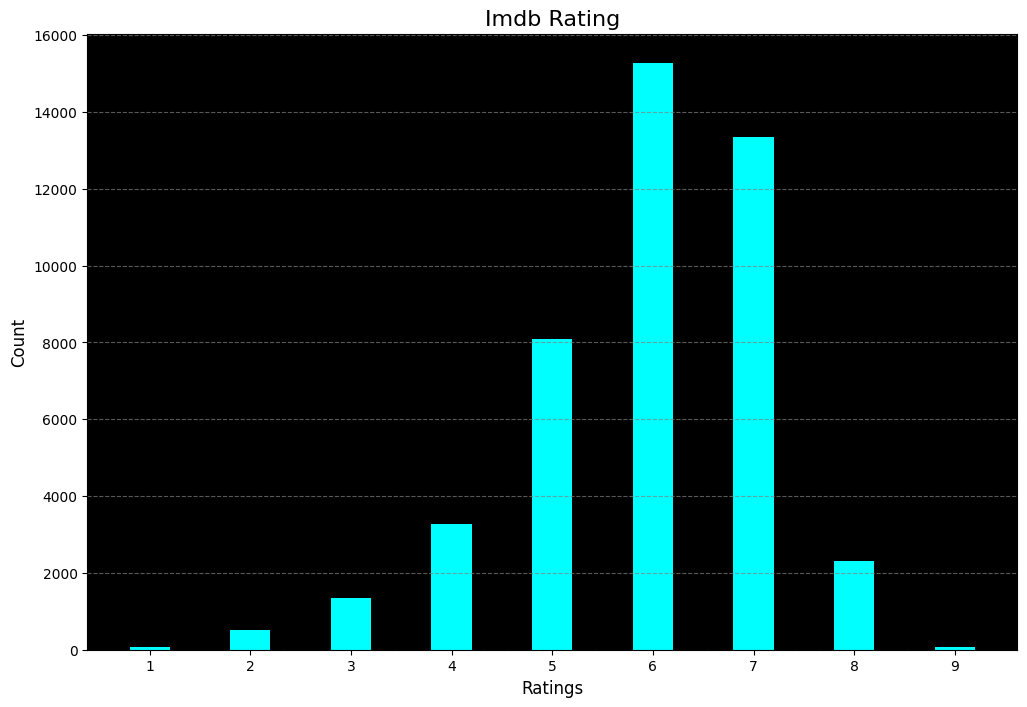

In [20]:
imdb_rating = dataframe['imdbRating'].dropna().apply(lambda x: int(x)).value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(imdb_rating.index, imdb_rating.values, color='cyan',width=0.4)

plt.title('Imdb Rating', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=imdb_rating.index)
plt.gca().set_facecolor('black')  
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.7)  
plt.show()


In [21]:
def strip_split(row):
    new_row = []
    row = row.split(',')
    for i in row:
        i = i.strip()
        new_row.append(i)
    return new_row

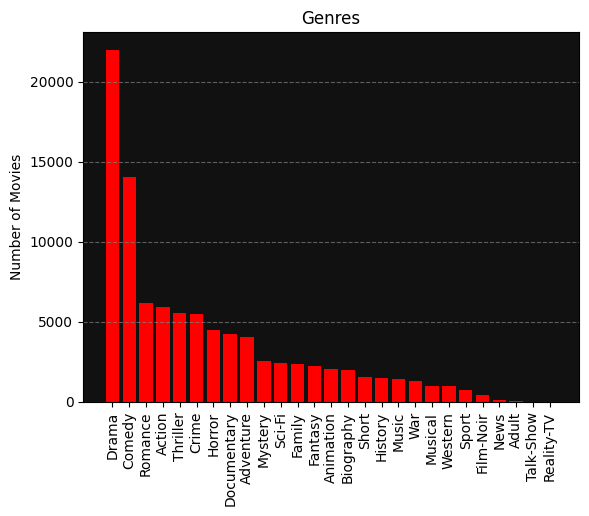

In [22]:

genre_counts = dataframe['genre'].dropna().apply(strip_split)
genre_counts = genre_counts.explode()
genre_counts_value = genre_counts.value_counts()


plt.bar(genre_counts_value.index, genre_counts_value.values,  color='red')

plt.title('Genres', color='black')
plt.ylabel('Number of Movies', color='black')
plt.xticks(ticks=genre_counts_value.index,rotation=90, color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('#111111')  
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)  


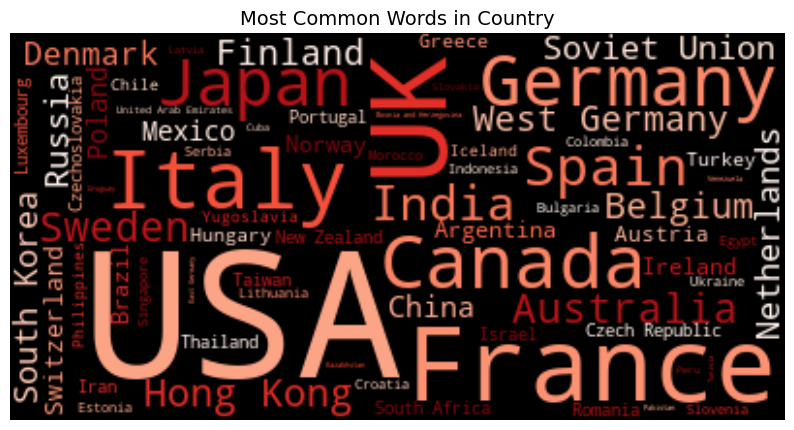

In [23]:

countries = dataframe['country'].dropna().apply(strip_split)
countries = countries.explode()
countries_value = countries.value_counts()

countries_value_dict = countries_value.to_dict()

wordcloud = WordCloud(background_color='black', colormap='Reds').generate_from_frequencies(countries_value_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Country', color='black',fontsize=14)
plt.show()


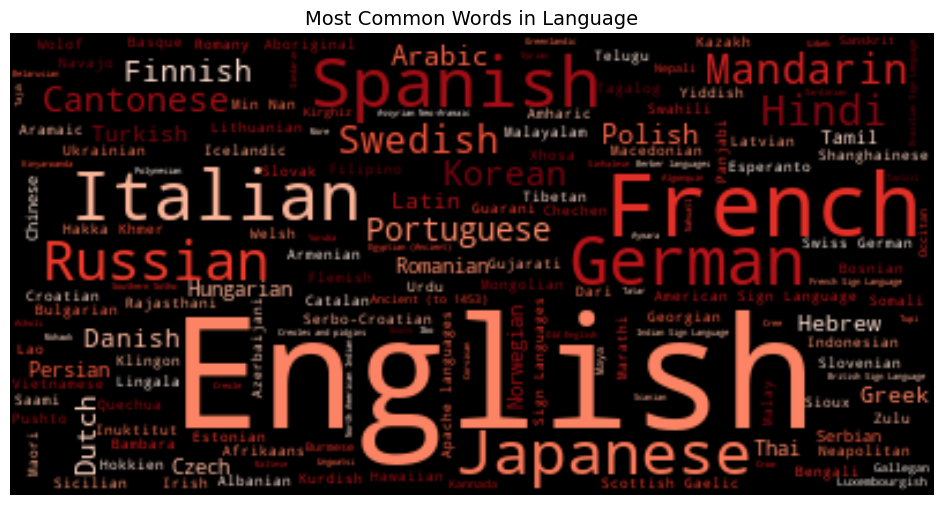

In [24]:

language = dataframe['language'].dropna().apply(strip_split)
language = language.explode()
language_value = language.value_counts()

language_value_dict = language_value.to_dict()

wordcloud = WordCloud(background_color='black', colormap='Reds').generate_from_frequencies(language_value_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Language', color='black',fontsize=14)
plt.show()


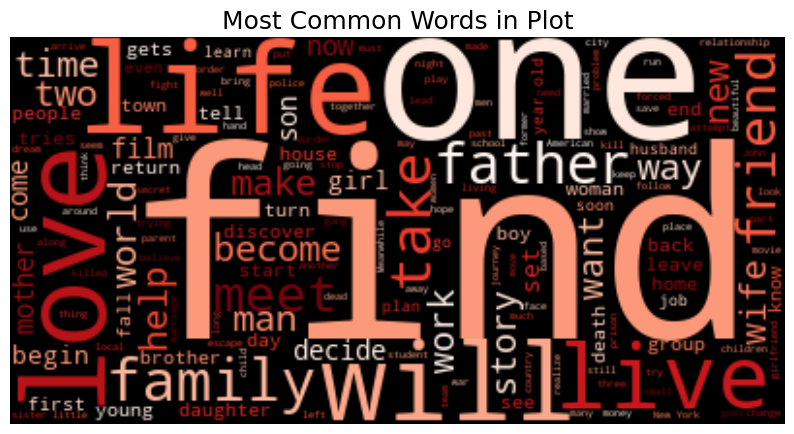

In [25]:

titles = dataframe['fullplot'].dropna().values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Plot', color='Black',fontsize=18)
plt.show()